# Clean Coding Principles

### Written by Zhongkai Wu, UCSD Alumn
### (Edited by Dr. Juavinett)

<hr>

The ability to write and organize code is a critical skill for data analysts.  Everyone writes messy first draft code, but when the amount of code reaches a critical volume, managing code starts to take up majority of time in your coding projects. **In this notebook, we'll go through 3 common examples of messy code.**

<hr>

## 1. Writing slightly different versions of the same code.

**Why is it bad?** This leads to problems when you want to make a change to the functions.  Separate versions eventually accumulate enough changes so that making a simple change to the same step in each function becomes a non trivial task

**What can we do about it?** Keep the code in smaller modules that can be assembled into bigger scripts.  This allows new changes to be applied quickly to each function and avoid slow drifts of functions that eventually lead to a mess to modify.

In [1]:
# Example of multiple version of the same code
import matplotlib.pyplot as plt
import numpy as np

def plot_group_scatters_plots(data):
    plt.figure(figsize=[5,5])
    for i in range(nplots):
        plt.subplot(4,4,i+1)
        plt.scatter(data[:,0,i],data[:,1,i])
        plt.title('subplot')
    plt.tight_layout()
    plt.show()

def plot_group_line_plots(data):
    plt.figure(figsize=[5,5])
    for i in range(nplots):
        plt.subplot(4,4,i+1)
        plt.plot(data[:,0,i],data[:,1,i])
        plt.title('subplot')
    plt.tight_layout()
    plt.show()

def plot_group_timeseries(data):
    plt.figure(figsize=[5,5])
    for i in range(nplots):
        plt.subplot(4,4,i+1)
        plt.plot(data[:,0,i])
        plt.plot(data[:,1,i])
        plt.title('subplot')
    plt.tight_layout()
    plt.show()

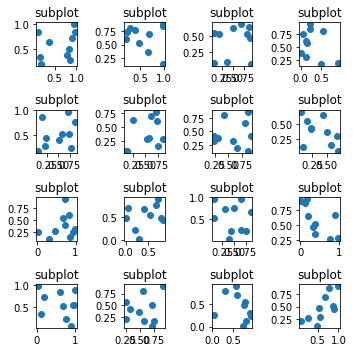

In [2]:
nplots = 16
ndata = 10
data = np.random.rand(ndata*nplots*2).reshape([ndata,2,nplots])
plot_group_scatters_plots(data)

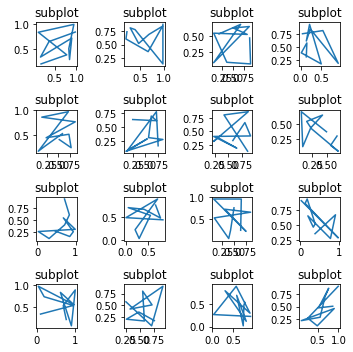

In [3]:
plot_group_line_plots(data)

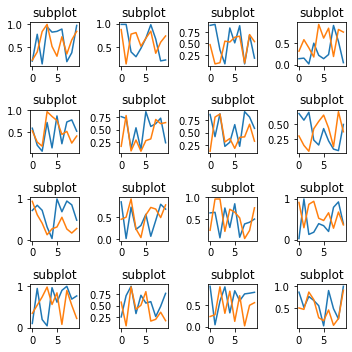

In [4]:
plot_group_timeseries(data)

### Making changes
The hypothetical example above shows the same dataset in three different ways. However, if we want to modify the functions so that the title for each subplot displays the subplot numbers *and* we want to show the subplots as 2 x 8 arrays, this would be a laborsome situation and we would have to edit each function individually.

The complexity of this operation can grow quickly as the functions becomes more complicated.  The **solution** is to break down functions into smaller modules that can be easily configured:

In [5]:
def show_group_plots(data,plot_function):
    plt.figure(figsize=[5,5])
    for i in range(nplots):
        plt.subplot(4,4,i+1)
        plot_function(data,i)
        plt.title(f'subplot ')
    plt.tight_layout()
    plt.show()

def plot_group_scatters_plots(data):
    plot_function = lambda data,i : plt.scatter(data[:,0,i],data[:,1,i])
    show_group_plots(data,plot_function)

def plot_group_line_plots(data):
    plot_function = lambda data,i : plt.plot(data[:,0,i],data[:,1,i])
    show_group_plots(data,plot_function)

def plot_group_timeseries(data):
    def plot_function(data,i): 
        plt.plot(data[:,0,i])
        plt.plot(data[:,1,i])
    show_group_plots(data,plot_function)

As you can see, the above code performs the same function, but is now much shorter and easier to modify.  We are also using an advanced trick where we are passing a function to another function as an argument.  This is a pretty useful concept to master, and allows for flexibility in many senarios.

<div class="alert alert-success">
    <b>Task</b>: Modify the code above so that it shows the plot number for each subplot and displays the plot as 2 x 8 arrays </div>

## 2. Naming variables with abstract letters 

We have all chosen sloppy variable names, and there is nothing wrong with that for data exploration!  However, if you plan to keep the analysis code for the long term, it makes sense to name variables more carefully.  In fact, programmers put so much emphasis on this concept, some coding books even insists that we should name our variables with the **same amount of consideration for naming a kid**!

You don't want your kid to be walking around with a funny name, or have some generic name like `a` `b` and `c`, when there are better names that clearily describes their characteristics. So name your variables carefully!

Let's say you have 10 seconds to look at the code snippet below...

In [6]:
# Use this block to time yourself!
import time
def countdown(t):
    while t:
        mins, secs = divmod(t, 60)
        timer = '{:02d}:{:02d}'.format(mins, secs)
        print(timer, end="\r")
        time.sleep(1)
        t -= 1
    print('Times up!!')

In [7]:
# Use our countdown timer
countdown(10)

import random
a=[random.randint(0,22) for _ in range(100)]
b=[i for i in a if i%2==0]
c=[i for i in a if i%2==1]
e = len(b)
f = len(c)
if e>f:
    print('more odd numbers')
    print(f'{np.abs(e-f)} more odd than even')
else:
    print('more even numbers')
    print(f'{np.abs(e-f)} more even than odd')

Times up!!
more even numbers
2 more even than odd


There is a **bug** in the function above, did you catch it?
The function above finds the number of even and odd elements in a list of integers and print out the difference between them.  However it is reporting more odd number when there are more evens, and vice versa.  

It is not so easy to catch this error if you are just glimpsing through your code.  Compare this to the following example:

In [45]:
all_integers=[random.randint(0,22) for _ in range(100)]

is_even = lambda i : i%2==0
is_odd = lambda i : i%2==1

even_numbers=[i for i in all_integers if is_even(i)]
odd_numbers=[i for i in all_integers if is_odd(i)]

n_even_numbers = len(even_numbers)
n_odd_numbers = len(odd_numbers)

more_even_numbers = n_even_numbers>n_odd_numbers 

if more_even_numbers:
    print('more odd numbers')
    print(f'{np.abs(n_even_numbers-n_odd_numbers)} more odd than even')
else:
    print('more even numbers')
    print(f'{np.abs(n_even_numbers-n_odd_numbers)} more even than odd')

more even numbers
4 more even than odd


You can see that by changing the name of the variables (and by adding spaces), we made the mistake more obvious.  Bugs happens when we are coding, and is often hard to catch, especially by glancing through code blocks. However, in science, one coding mistake could mean a false positve or negative results. Naming the variables carefully for code that will be reused make sure that mistakes can be caught easily.

## 3. Passing multiple variables into a function and getting the same, but slightly modified result out

This doesn't seem like a big mistake, until you have 5-10 variables that you are passing in and out of functions.  Whenever you are trying to add new variables to the list, you have to modify all the function definition and function calls.

**Solution**: Use object-oriented programming to organize the variables.  This will make modifications easier and increase readibility of the code

In [50]:
def switch_variables(first,second,third,fifth):
    copy_of_first = first
    first = second
    second = fifth
    fifth = third
    third = copy_of_first
    return first,second,third,fifth

def add_and_multiply(first,second,third,fifth,addition=0,multiplication = 1):
    return (np.array([first,second,third,fifth])+addition)* multiplication

def add_to_even_and_odd_variables(first,second,third,fifth,even_addition=0,odd_addition = 0):
    second = second+even_addition
    first,third,fifth = np.array([first,third,fifth])+odd_addition
    return first,second,third,fifth

first,second,third,forth,fifth = 1,2,3,4,5
first,second,third,fifth = switch_variables(first,second,third,fifth)
first,second,third,fifth = add_and_multiply(first,second,third,fifth,2,4)
first,second,third,fifth = add_to_even_and_odd_variables(first,second,third,fifth,1,3)
print(first,second,third,forth,fifth)

19 29 15 4 23


The functions above applies a bunch of manipulations to 5 numbers and leaves the fourth alone.  If we want to add the fourth number in however, there are a lot of modification involved.

Compare this to the following:

In [8]:
class NumberCruncher:
    
    def __init__(self,first,second,third,forth,fifth):
        self.first,self.second,self.third,self.forth,self.fifth = first,second,third,forth,fifth

    def switch_variables(self):
        copy_of_first = self.first
        self.first = self.second
        self.second = self.fifth
        self.fifth = self.third
        self.third = copy_of_first

    def add_and_multiply(self,addition=0,multiplication = 1):
        self.first,self.second,self.third,self.fifth = \
             (np.array([self.first,self.second,self.third,self.fifth])+addition)* multiplication

    def add_to_even_and_odd_variables(self,even_addition=0,odd_addition = 0):
        self.second = self.second+even_addition
        self.first,self.third,self.fifth = np.array([self.first,self.third,self.fifth])+odd_addition
    
    def print_numbers(self):
        print(self.first,self.second,self.third,self.forth,self.fifth)

first,second,third,forth,fifth = 1,2,3,4,5

cruncher = NumberCruncher(first,second,third,forth,fifth)
cruncher.switch_variables()
cruncher.add_and_multiply(2,4)
cruncher.add_to_even_and_odd_variables(1,3)
cruncher.print_numbers()

19 29 15 4 23


You can see that with the object-oriented organization, all the variables become attributes of the class, making it easier to add in new variables without having the change the functions calls at each step.

Our class methods also make the function calls more distinct. You can see that functions such as **add_and_multiply** and **add_to_even_and_odd_variables** are technically functions that perform two things -- ideally, functions perform just one task.

You can also see that the ordering of arguments matches the description in the function name. For example, in **add_and_multiply** we pass in the addition factors first and then the multiplication factor. Details like this also help the code to be easier to use.

## Additional Resource
[Good Research Code Handbook](https://goodresearch.dev/)